#***Carlos Gross-Martinez***
#***Reinforcement Learning***
#***Link to Google Collab Notebook***
#https://colab.research.google.com/drive/1mIpu2Tb4LvrjpcFBoev3mT8F7WsUCKnY?usp=sharing

#***Pseudo Code***
#build the maze
#define actions array
#create a neural network
#define optimizer and loss function
#define any variables to hold information per iteration
#create the loop to train neural network for a number of iterations
#declare variables for the loop to train NN
#create a loop that will only stop after the goal state is found
#use the NN model to predict q values based on the state
#select and action 
#update the state of the agent after the action
#calculate the reward for new state and check if state is goal state
#use NN model to predict q value of new state
#update q table
#optimize and fit the NN model
#set the new state to current state
#the loop finishes after goal state has bebe found for current iteration
#after episode has been completed, save MSE and weights to lists
#plot mse for each iteration
#plot weights for each iteration

In [2]:
import numpy as np
import tensorflow as tf

#define the maze as a 3x3 matrix
maze = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 0]
])

#define the actions
actions = ['up', 'down', 'left', 'right']

#create NN
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(4, activation='softmax')
])

#Declaratrion of variables
optimizer = tf.keras.optimizers.Adam(lr=0.01)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

mse_list = []
weights_inputs_first_layer = []
weights_bias_first_layer = []
weights_inputs_second_layer = []
weights_bias_second_layer = []

#training NN with Q learning
for i in range(100):
    state = np.zeros(9)
    state[0] = 1  # Start position
    done = False
    while not done:
        #select action using the current q values
        q_values = model.predict(np.array([state]))
        action = actions[np.argmax(q_values)]
        
        #update the state based on action selected
        if action == 'up':
            next_state = np.roll(state.reshape((3,3)), -1, axis=0).flatten()
        elif action == 'down':
            next_state = np.roll(state.reshape((3,3)), 1, axis=0).flatten()
        elif action == 'left':
            next_state = np.roll(state.reshape((3,3)), -1, axis=1).flatten()
        elif action == 'right':
            next_state = np.roll(state.reshape((3,3)), 1, axis=1).flatten()
        
        #calculate the reward for the new state
        if next_state[8] == 1:  # Reached the goal
            reward = 10
            done = True
        elif maze[tuple(np.argwhere(next_state.reshape((3,3)) == 1)[0])] == 1:  # Hit a wall
            reward = -5
            done = True
        else:  
            reward = -1
            done = False
        
        #update the Q-value table
        q_next = model.predict(np.array([next_state]))
        target = reward + 0.9 * np.max(q_next)
        q_values[0][actions.index(action)] = target
        y = np.zeros((1, 4))
        y[0] = q_values
        model.compile(optimizer, loss_fn)
        model.fit(np.array([state]), y, epochs=1, verbose=0)
        
        #update the current state
        state = next_state

    #save NN metric to lists
    mse_list.append(loss_fn(y, model.predict(np.array([state]))))
    weights_inputs_first_layer.append(model.layers[0].get_weights()[0]) 
    weights_bias_first_layer.append(model.layers[0].get_weights()[1])
    weights_inputs_second_layer.append(model.layers[1].get_weights()[0])
    weights_bias_second_layer.append(model.layers[1].get_weights()[1])

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 42ms/step


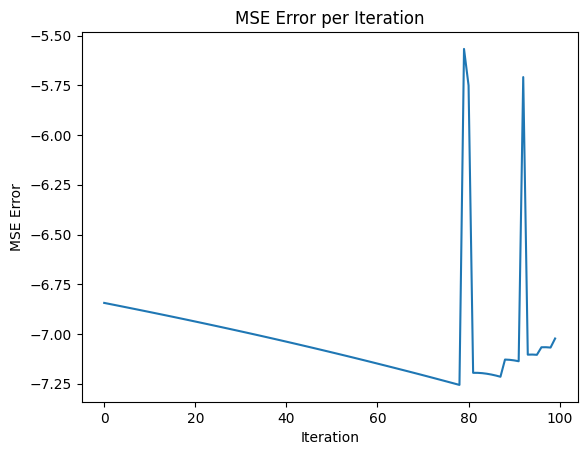

In [3]:
import matplotlib.pyplot as plt

mse_np = np.array(mse_list)

#plot MSE
x = np.arange(0, 100)
plt.plot(x, mse_np)
plt.xlabel('Iteration')
plt.ylabel('MSE Error')
plt.title('MSE Error per Iteration')
plt.show()

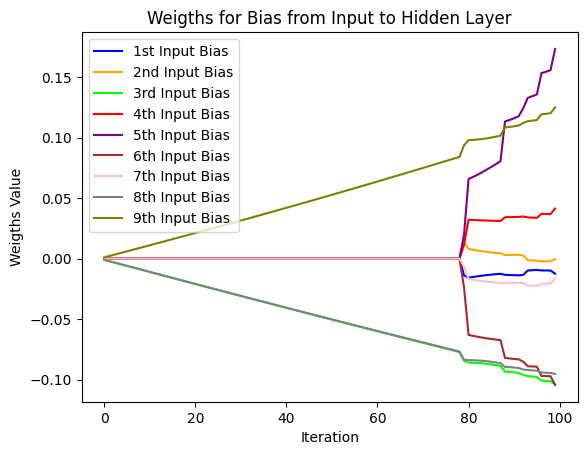

In [74]:
weights_bias_first_layer_np = np.array(weights_bias_first_layer)

#plotting weights
plt.plot(x, weights_bias_first_layer_np[:, 0], color = 'blue', label ='1st Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 1], color = 'orange', label = '2nd Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 2], color = 'lime', label = '3rd Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 3], color = 'red', label = '4th Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 4], color = 'purple', label = '5th Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 5], color = 'brown', label = '6th Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 6], color = 'pink', label = '7th Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 7], color = 'gray', label = '8th Input Bias')
plt.plot(x, weights_bias_first_layer_np[:, 8], color = 'olive', label = '9th Input Bias')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weigths for Bias from Input to Hidden Layer')
plt.legend(loc='upper left')
plt.show()

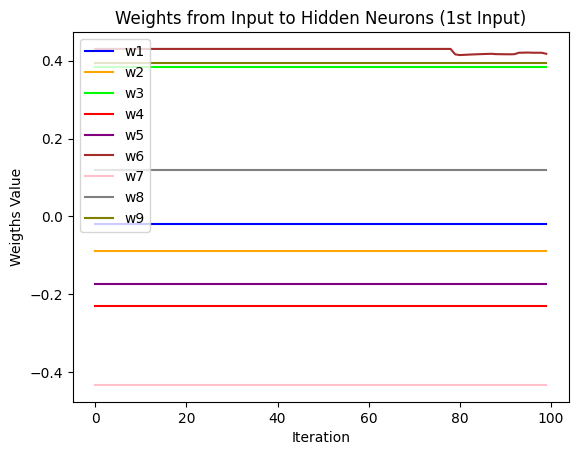

In [83]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 0], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 0], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 0], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 0], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 0], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 0], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 0], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 0], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 0], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (1st Input)')
plt.legend(loc='upper left')
plt.show()

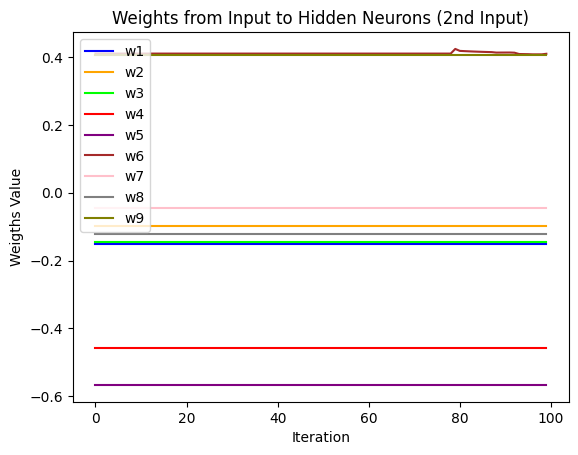

In [84]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 1], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 1], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 1], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 1], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 1], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 1], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 1], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 1], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 1], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (2nd Input)')
plt.legend(loc='upper left')
plt.show()

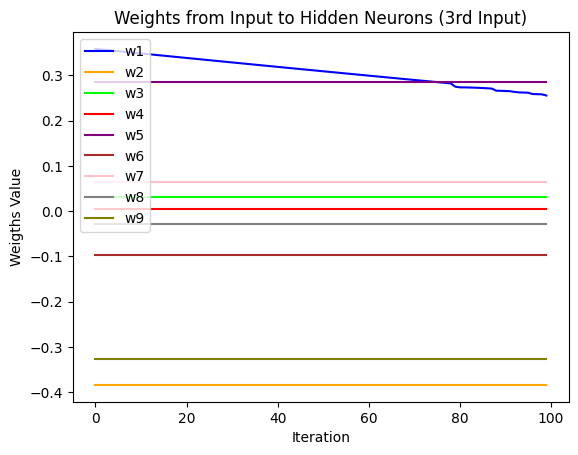

In [85]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 2], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 2], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 2], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 2], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 2], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 2], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 2], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 2], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 2], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (3rd Input)')
plt.legend(loc='upper left')
plt.show()

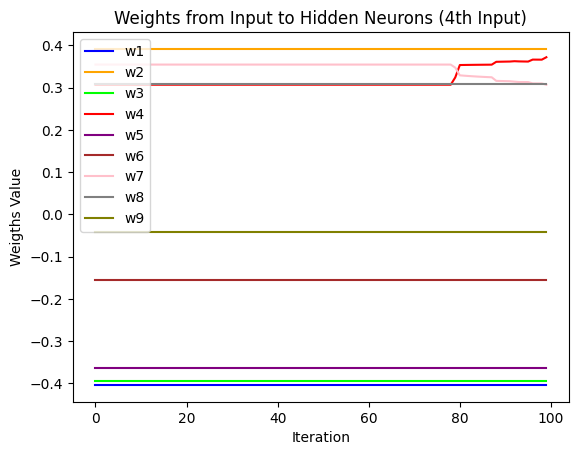

In [86]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 3], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 3], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 3], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 3], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 3], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 3], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 3], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 3], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 3], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (4th Input)')
plt.legend(loc='upper left')
plt.show()

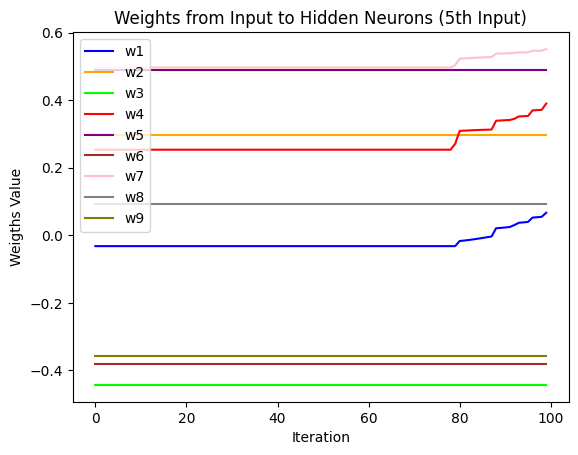

In [87]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 4], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 4], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 4], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 4], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 4], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 4], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 4], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 4], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 4], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (5th Input)')
plt.legend(loc='upper left')
plt.show()

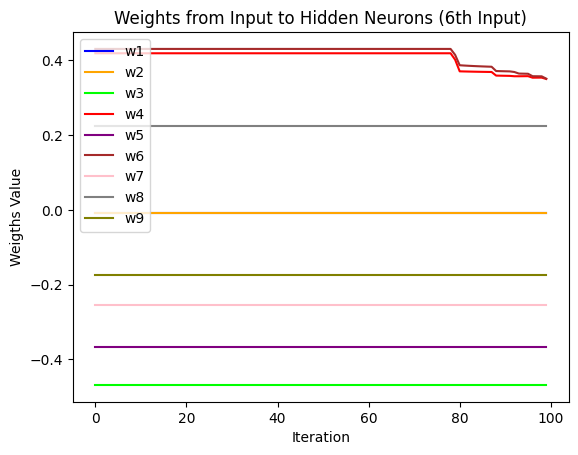

In [88]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 5], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 5], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 5], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 5], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 5], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 5], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 5], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 5], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 5], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (6th Input)')
plt.legend(loc='upper left')
plt.show()

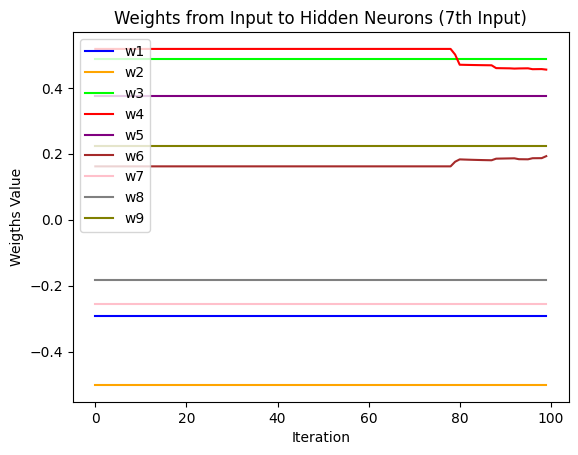

In [89]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 6], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 6], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 6], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 6], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 6], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 6], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 6], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 6], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 6], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (7th Input)')
plt.legend(loc='upper left')
plt.show()

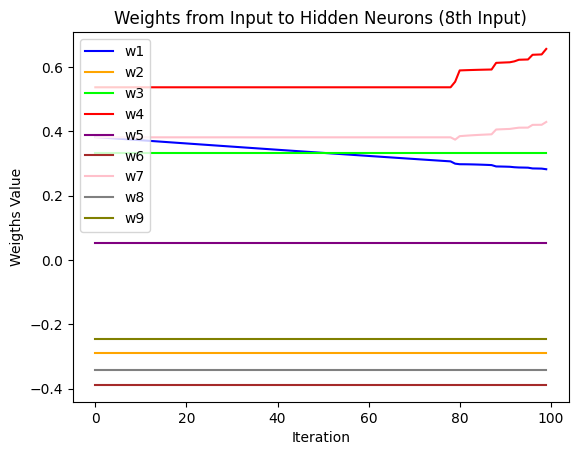

In [91]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 7], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 7], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 7], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 7], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 7], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 7], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 7], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 7], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 7], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (8th Input)')
plt.legend(loc='upper left')
plt.show()

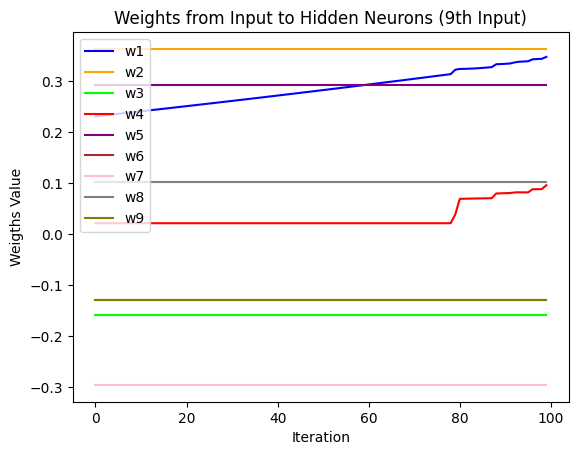

In [92]:
weights_inputs_first_layer_np = np.array(weights_inputs_first_layer)

#plotting weights
plt.plot(x, weights_inputs_first_layer_np[:, 0, 8], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_first_layer_np[:, 1, 8], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_first_layer_np[:, 2, 8], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_first_layer_np[:, 3, 8], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_first_layer_np[:, 4, 8], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_first_layer_np[:, 5, 8], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_first_layer_np[:, 6, 8], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_first_layer_np[:, 7, 8], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_first_layer_np[:, 8, 8], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Input to Hidden Neurons (9th Input)')
plt.legend(loc='upper left')
plt.show()

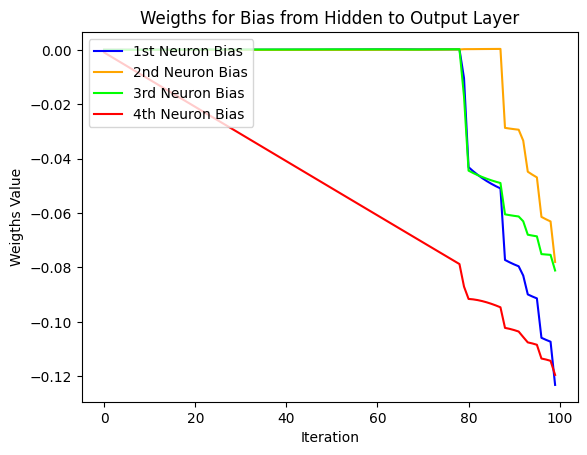

In [60]:
weights_bias_second_layer_np = np.array(weights_bias_second_layer)

#plotting weights
plt.plot(x, weights_bias_second_layer_np[:, 0], color = 'blue', label ='1st Neuron Bias')
plt.plot(x, weights_bias_second_layer_np[:, 1], color = 'orange', label = '2nd Neuron Bias')
plt.plot(x, weights_bias_second_layer_np[:, 2], color = 'lime', label = '3rd Neuron Bias')
plt.plot(x, weights_bias_second_layer_np[:, 3], color = 'red', label = '4th Neuron Bias')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weigths for Bias from Hidden to Output Layer')
plt.legend(loc='upper left')
plt.show()

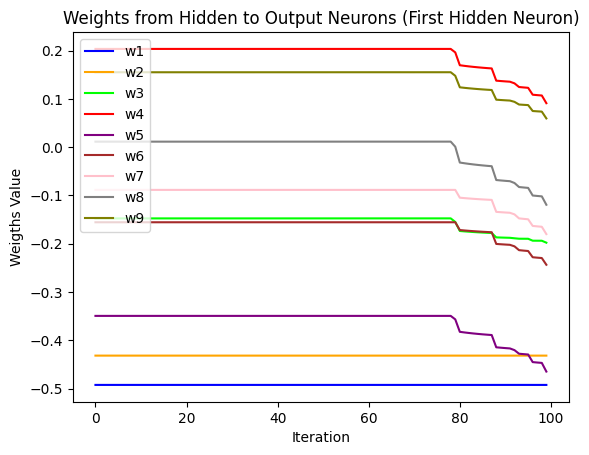

In [62]:
weights_inputs_second_layer_np = np.array(weights_inputs_second_layer)

#plotting weights
plt.plot(x, weights_inputs_second_layer_np[:, 0 , 0], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_second_layer_np[:, 1, 0], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_second_layer_np[:, 2, 0], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_second_layer_np[:, 3, 0], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_second_layer_np[:, 4, 0], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_second_layer_np[:, 5, 0], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_second_layer_np[:, 6, 0], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_second_layer_np[:, 7, 0], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_second_layer_np[:, 8, 0], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Hidden to Output Neurons (First Hidden Neuron)')
plt.legend(loc='upper left')
plt.show()

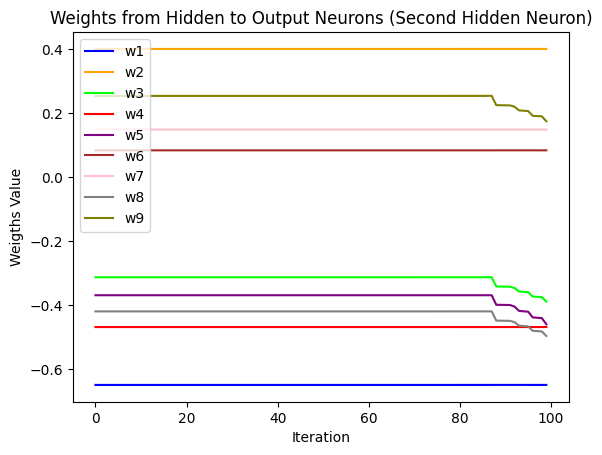

In [58]:
weights_inputs_second_layer_np = np.array(weights_inputs_second_layer)

#plotting weights
plt.plot(x, weights_inputs_second_layer_np[:, 0 , 1], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_second_layer_np[:, 1, 1], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_second_layer_np[:, 2, 1], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_second_layer_np[:, 3, 1], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_second_layer_np[:, 4, 1], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_second_layer_np[:, 5, 1], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_second_layer_np[:, 6, 1], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_second_layer_np[:, 7, 1], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_second_layer_np[:, 8, 1], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Hidden to Output Neurons (Second Hidden Neuron)')
plt.legend(loc='upper left')
plt.show()

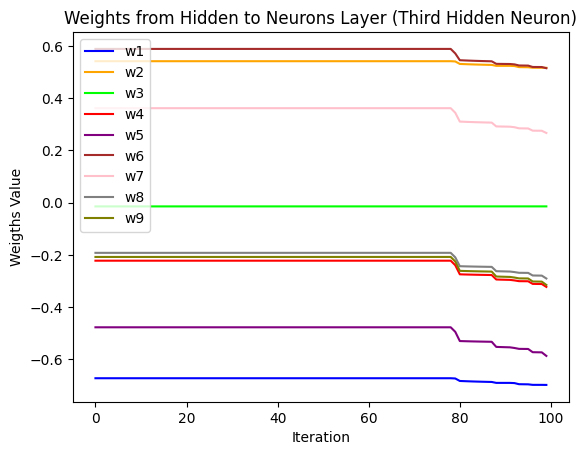

In [57]:
weights_inputs_second_layer_np = np.array(weights_inputs_second_layer)

#plotting weights
plt.plot(x, weights_inputs_second_layer_np[:, 0 , 2], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_second_layer_np[:, 1, 2], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_second_layer_np[:, 2, 2], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_second_layer_np[:, 3, 2], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_second_layer_np[:, 4, 2], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_second_layer_np[:, 5, 2], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_second_layer_np[:, 6, 2], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_second_layer_np[:, 7, 2], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_second_layer_np[:, 8, 2], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Hidden to Neurons Layer (Third Hidden Neuron)')
plt.legend(loc='upper left')
plt.show()

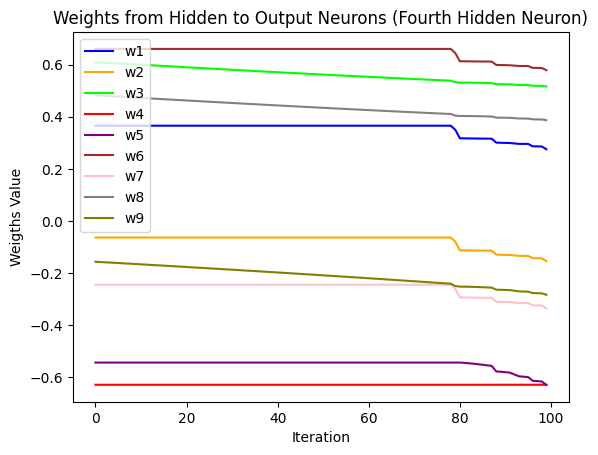

In [56]:
weights_inputs_second_layer_np = np.array(weights_inputs_second_layer)

#plotting weights
plt.plot(x, weights_inputs_second_layer_np[:, 0 , 3], color = 'blue', label ='w1')
plt.plot(x, weights_inputs_second_layer_np[:, 1, 3], color = 'orange', label = 'w2')
plt.plot(x, weights_inputs_second_layer_np[:, 2, 3], color = 'lime', label = 'w3')
plt.plot(x, weights_inputs_second_layer_np[:, 3, 3], color = 'red', label = 'w4')
plt.plot(x, weights_inputs_second_layer_np[:, 4, 3], color = 'purple', label = 'w5')
plt.plot(x, weights_inputs_second_layer_np[:, 5, 3], color = 'brown', label = 'w6')
plt.plot(x, weights_inputs_second_layer_np[:, 6, 3], color = 'pink', label = 'w7')
plt.plot(x, weights_inputs_second_layer_np[:, 7, 3], color = 'gray', label = 'w8')
plt.plot(x, weights_inputs_second_layer_np[:, 8, 3], color = 'olive', label = 'w9')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weights from Hidden to Output Neurons (Fourth Hidden Neuron)')
plt.legend(loc='upper left')
plt.show()